## Jupyter Hello World

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    "Name": ["A", "B", "C"],
    "Age": [2, 5, 6],
    "Salary": ["3k", "5k", "4k"]
}

In [4]:
df = pd.DataFrame(data)
indexes = df.index = ["TOM", "BOB", "HOP"]
# print(df)
print(df.describe())

            Age
count  3.000000
mean   4.333333
std    2.081666
min    2.000000
25%    3.500000
50%    5.000000
75%    5.500000
max    6.000000


## Second Task - Load and Explore Data
#### I created cdv file name `people.csv` and stored some data in it.

In [24]:
data = pd.read_csv("people.csv")
data.head()
data.describe()
data.info()
data["city"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   age     5 non-null      int64 
 2   city    5 non-null      object
 3   salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


city
Karachi      2
Lahore       2
Islamabad    1
Name: count, dtype: int64

#### Above I extracted data from csv file and tested some of pandas output methods

In [6]:
data.sort_values("salary", ascending=False)
data["tax"] = data["salary"] * 0.03
data.tail()

,name,age,city,salary,tax
0,Alice,25,Karachi,50000,1500.0
1,Bob,32,Lahore,60000,1800.0
2,Charlie,29,Islamabad,55000,1650.0
3,David,40,Karachi,65000,1950.0
4,Eve,27,Lahore,52000,1560.0


#### I created new column above with name `tax` and added tax value by multiplying with salary index

In [22]:
data["age_band"] = pd.cut(data["age"], bins=[0,25,30,40,100], labels=["<25", "26-30", "31-40", "40>"])
data.head()

,name,age,city,salary,tax,age_band
0,Alice,25.0,Karachi,50000.0,1500.0,<25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Charlie,29.0,Islamabad,55000.0,1650.0,26-30
3,David,40.0,Karachi,65000.0,1950.0,31-40
4,Eve,27.0,Lahore,52000.0,1560.0,26-30


In [26]:
data["name"].str.upper()
data.head()

,name,age,city,salary
0,Alice,25,Karachi,50000
1,Bob,32,Lahore,60000
2,Charlie,29,Islamabad,55000
3,David,40,Karachi,65000
4,Eve,27,Lahore,52000


### There are multiple things I can do here. I can use methods to filter some data, to change. I can also add date items in this data. Later, I will show how to create graph using this data.

In [30]:
data["year"] = pd.to_datetime(['2024-01-10','2023-11-02','2025-02-15','2024-06-01','2025-01-20'])
data.groupby('city', as_index=False).agg(
    avg_salary=('salary','mean'),
    count=('name','count')
)

,city,avg_salary,count
0,Islamabad,55000.0,1
1,Karachi,57500.0,2
2,Lahore,56000.0,2


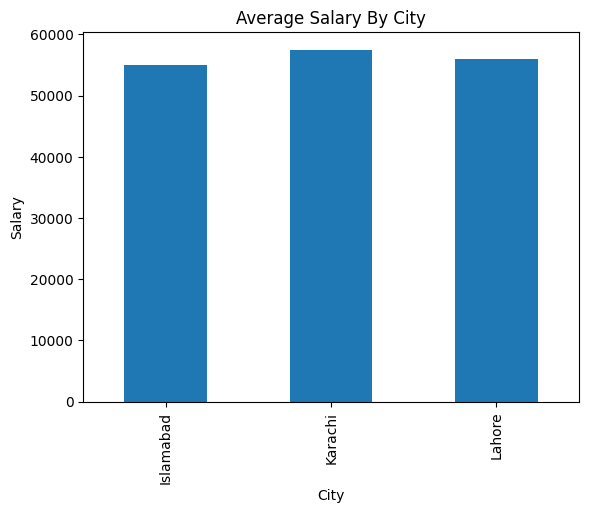

In [39]:
data.groupby("city")["salary"].mean().plot(kind="bar")
plt.title("Average Salary By City")
plt.xlabel("City")
plt.ylabel("Salary")
plt.show()

<Axes: xlabel='name'>

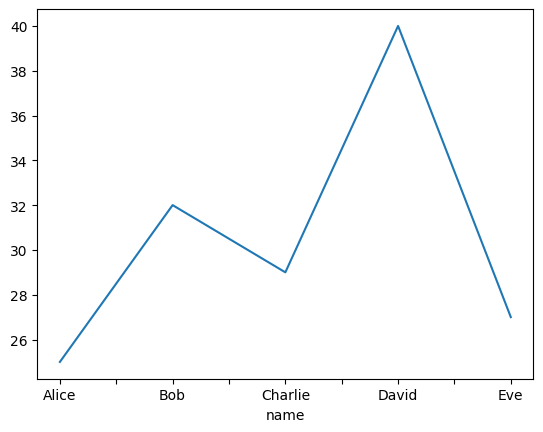

In [51]:
# Average Employee Age
data.groupby("name")["age"].mean().plot(kind="line")

#### In above case, I don't need to install matplotlib, pandas under the hood installed this lib and I can just call .plot(). In production apps. I need to install matplotlib for extra tweaking like title 